In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [35]:
# Afficher le répertoire courant
print("Répertoire courant :", os.getcwd())



Répertoire courant : I:\Leroy Python\R Airmiles


In [36]:
import os

In [37]:
# Changer de répertoire (remplacez le chemin par celui de votre dossier)
os.chdir(r'I:\Leroy Python\R Airmiles')
print("Nouveau répertoire :", os.getcwd())

Nouveau répertoire : I:\Leroy Python\R Airmiles


In [38]:
# Charger les fichiers
dt_sample_numeric_final = pd.read_csv("dt_sample_numeric.csv")

In [39]:
print(os.listdir())

['.RData', '.RDataTmp', '.RDataTmp1', '.Rhistory', '.Rproj.user', 'Airmiles.Rmd', 'Clustering Airmiles.Rmd', 'df_members_extracted.csv', 'df_reward_extracted.csv', 'df_transaction_extracted.csv', 'dt_merged.csv', 'dt_merged_export.csv', 'dt_merged_final.csv', 'dt_pca.bin', 'dt_pca.desc', 'dt_pca_exp.csv', 'dt_pca_export.csv', 'dt_sample_aggregated.csv', 'dt_sample_numeric.csv', 'dt_sample_numeric_final.csv', 'dt_sample_scaled_final.csv', 'dt_scaled_no_id.csv', 'dt_scaled_numeric.csv', 'MEMBERS_DIM.csv', 'R Airmiles.Rproj', 'REWARD_FACT.csv', 'TRANSACTION_FACT.csv']


In [40]:
# Vérifier les premières lignes
print(dt_sample_numeric_final.head())

   TOTAL_TRANSACTIONS  TOTAL_AMOUNT_SPENT  TOTAL_BASE_POINTS_EARNED  \
0            0.101062            3.330820                  3.453477   
1            0.060747            2.865660                  2.983549   
2            0.003236            0.633247                  0.495510   
3           -0.005552            0.323660                  0.368027   
4           -0.000705            0.458714                  0.288552   

   TOTAL_BONUS_POINTS_EARNED  TOTAL_REWARD_POINTS_EARNED  \
0                   2.518269                    3.931208   
1                   2.356308                    3.296194   
2                   1.171487                   -0.542395   
3                   0.887710                    2.118312   
4                  -0.003419                   -0.542395   

   TOTAL_CASH_BACK_POINTS_EARNED  TOTAL_REDEMPTIONS  TOTAL_ITEMS_REDEEMED  \
0                       2.626919          16.492592             18.234796   
1                       2.435392          18.249889       

In [41]:
# 3️⃣ Vérifier les types de données et exclure les variables non numériques si besoin
df_scaled = dt_sample_numeric_final.select_dtypes(include=[np.number])

In [13]:
# 4️⃣ Standardiser les données avec StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [42]:
# 5️⃣ Appliquer l'ACP (choisir un nombre de composantes = min(n_samples, n_features))
n_components = min(df_scaled.shape[0], df_scaled.shape[1])  # Limite max de composantes
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(df_scaled)

In [43]:
# 6️⃣ Analyser la variance expliquée par chaque composante
explained_variance_ratio = pca.explained_variance_ratio_ * 100  # Convertir en pourcentage

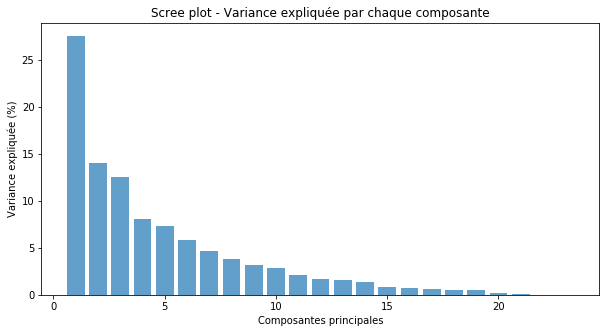

In [44]:
# Tracer le graphique des variances expliquées
plt.figure(figsize=(10,5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel("Composantes principales")
plt.ylabel("Variance expliquée (%)")
plt.title("Scree plot - Variance expliquée par chaque composante")
plt.show()

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Variance expliquée par composante
variance_expliquee = pca.explained_variance_ratio_ * 100


In [47]:
variance_accumulative = np.cumsum(variance_expliquee)


In [48]:
df_variance = pd.DataFrame({
    'Composante': [f'PC{i+1}' for i in range(len(variance_expliquee))],
    'Variance expliquée (%)': variance_expliquee,
    'Variance accumulative (%)': variance_accumulative
})

print(df_variance)


   Composante  Variance expliquée (%)  Variance accumulative (%)
0         PC1               27.554260                  27.554260
1         PC2               13.993017                  41.547278
2         PC3               12.528772                  54.076050
3         PC4                8.042491                  62.118540
4         PC5                7.364998                  69.483538
5         PC6                5.870467                  75.354005
6         PC7                4.624004                  79.978009
7         PC8                3.822187                  83.800196
8         PC9                3.183374                  86.983570
9        PC10                2.893204                  89.876775
10       PC11                2.066540                  91.943314
11       PC12                1.645261                  93.588575
12       PC13                1.584665                  95.173240
13       PC14                1.361385                  96.534625
14       PC15            

In [49]:
# 7️⃣ Sélectionner un nombre optimal de composantes (exemple : 6)
n_optimal = 6  # À ajuster selon le scree plot
pca_final = PCA(n_components=n_optimal)
df_pca_final = pca_final.fit_transform(df_scaled)

In [50]:
# 8️⃣ Créer un DataFrame avec les nouvelles composantes principales
df_pca_final = pd.DataFrame(df_pca_final, columns=[f"PC{i+1}" for i in range(n_optimal)])

In [51]:
# 9️⃣ Ajouter l'index des individus pour suivre l'analyse
df_pca_final.index = dt_sample_numeric_final.index

In [52]:
#  🔟 Afficher un aperçu des données après ACP
print(df_pca_final.head())

         PC1       PC2       PC3        PC4       PC5       PC6
0  17.761694  9.717007 -4.545911 -18.450894  1.431818 -7.471921
1  14.347247  5.903530 -2.858452 -13.678646  1.828029 -4.043891
2   2.452436 -0.631723  0.372183   0.144279 -0.328584  0.712602
3   1.423233  1.045267 -1.798198   1.611409 -1.317836  0.893866
4   1.152674 -0.801403  0.439102   0.832141 -0.255271  0.957981


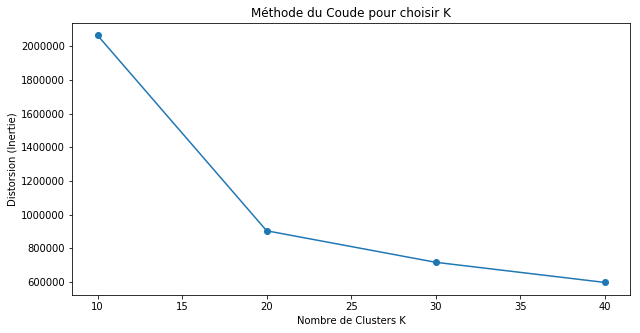

In [70]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Définir les valeurs de K à tester
distortions = []
K_range = range(10, 50, 10)  # Teste de 10 à 50 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca_final)
    distortions.append(kmeans.inertia_)  # Inertie = variance intra-cluster

# Tracer la courbe du coude
plt.figure(figsize=(10, 5))
plt.plot(K_range, distortions, marker='o')
plt.xlabel('Nombre de Clusters K')
plt.ylabel('Distorsion (Inertie)')
plt.title('Méthode du Coude pour choisir K')
plt.show()


In [71]:
# 1️⃣ Importer les librairies nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [72]:
from scipy.cluster.hierarchy import linkage, dendrogram


In [73]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

In [74]:
# 1️⃣ Appliquer K-means sur l'ensemble des données avec 20 clusters
n_clusters = 20  # Nombre de clusters K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_pca_final["Pre_Cluster"] = kmeans.fit_predict(df_pca_final)

In [75]:
# 2️⃣ Moyenniser les clusters pour obtenir les centroïdes
df_pca_reduced = df_pca_final.groupby("Pre_Cluster").mean()
print(f"Taille des centroïdes après regroupement : {df_pca_reduced.shape}")

Taille des centroïdes après regroupement : (20, 6)


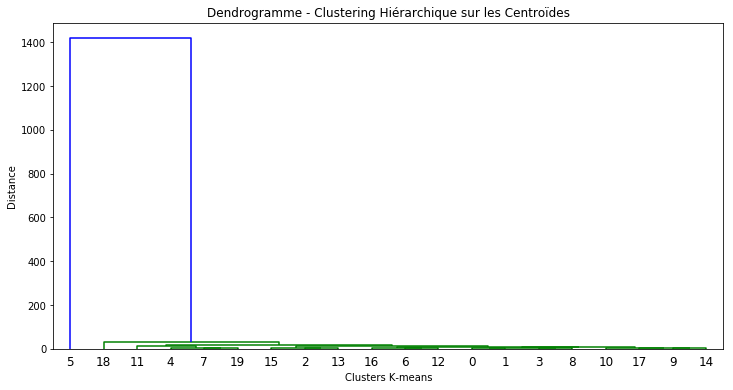

In [76]:
# 3️⃣ Appliquer le clustering hiérarchique sur les centroïdes obtenus
plt.figure(figsize=(12, 6))
linked = linkage(df_pca_reduced, method='ward')  # Méthode Ward pour minimiser la variance intra-cluster
dendrogram(linked)
plt.title("Dendrogramme - Clustering Hiérarchique sur les Centroïdes")
plt.xlabel("Clusters K-means")
plt.ylabel("Distance")
plt.show()

In [77]:
from scipy.cluster.hierarchy import fcluster

In [87]:
# 4️⃣ Déterminer le nombre optimal de clusters (exemple : 5 clusters)
optimal_clusters = 4  # Choisir un nombre basé sur l'analyse du dendrogramme
df_pca_reduced["Hierarchical_Cluster"] = fcluster(linked, optimal_clusters, criterion="maxclust")

In [88]:
# 5️⃣ Associer ces clusters au dataset original via K-means
df_pca_final["Final_Cluster"] = df_pca_final["Pre_Cluster"].map(df_pca_reduced["Hierarchical_Cluster"])

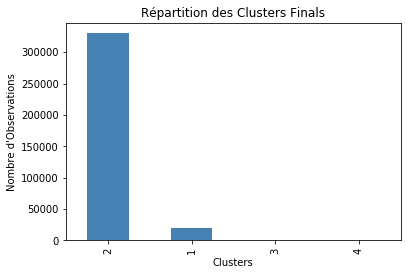

In [89]:
# Afficher la répartition des clusters
df_pca_final["Final_Cluster"].value_counts().plot(kind="bar", color="steelblue")
plt.title("Répartition des Clusters Finals")
plt.xlabel("Clusters")
plt.ylabel("Nombre d'Observations")
plt.show()

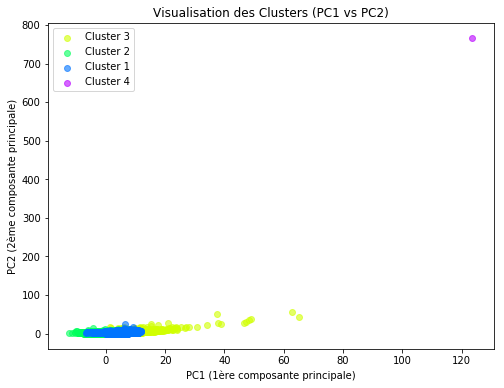

In [90]:
# Définition des couleurs pour chaque cluster
colors = sns.color_palette("hsv", len(df_pca_final["Final_Cluster"].unique()))

plt.figure(figsize=(8, 6))
for i, cluster in enumerate(df_pca_final["Final_Cluster"].unique()):
    subset = df_pca_final[df_pca_final["Final_Cluster"] == cluster]
    plt.scatter(subset.iloc[:, 0], subset.iloc[:, 1], 
                label=f"Cluster {cluster}", color=colors[i], alpha=0.6)

plt.title("Visualisation des Clusters (PC1 vs PC2)")
plt.xlabel("PC1 (1ère composante principale)")
plt.ylabel("PC2 (2ème composante principale)")
plt.legend()
plt.show()

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [55]:
# Réduction de dimensions avec ACP (5 composantes)
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)

# Transformer en DataFrame pour K-Means
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(6)])


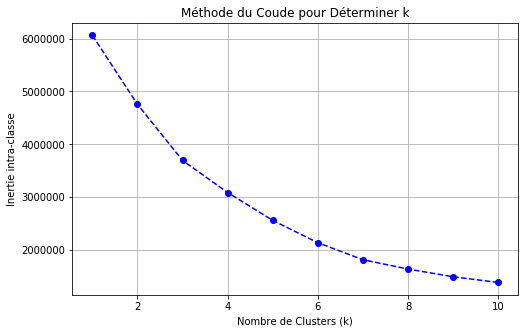

In [56]:
# Tester plusieurs valeurs de k
inertia = []
K_range = range(1, 11)  # Tester de 1 à 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# Tracer la méthode du coude
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel("Nombre de Clusters (k)")
plt.ylabel("Inertie intra-classe")
plt.title("Méthode du Coude pour Déterminer k")
plt.grid()
plt.show()


In [57]:
# Nombre optimal de clusters (exemple : 5, à ajuster selon le graphe)
k_optimal = 4  # À modifier selon le coude trouvé

# Appliquer K-Means
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df_pca["Cluster"] = kmeans.fit_predict(df_pca)


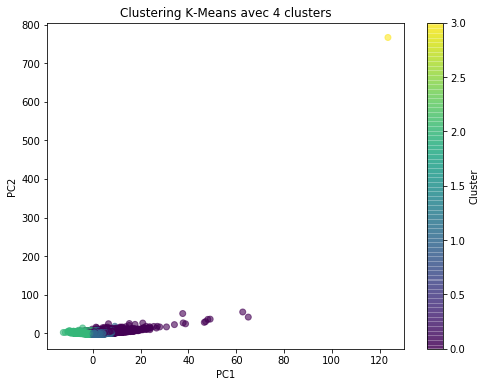

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"Clustering K-Means avec {k_optimal} clusters")
plt.colorbar(label="Cluster")
plt.show()
